# Chicago Car Crashes

**By Yamuna Umapathy & Lotus Baumgarner**

## Business Problem:

This project is about finding the primary car accidents that lead to injuries in one of the most busiest city Chicago. Sources say Weather conditions, Heavy Traffic in Peak Hours, Vehicle Condition, Other driver's improper driving behaviours, Late night drivings, Texting while driving are some of the factors which causes car crashes.

Our Insurance Carrier wants us to build a model to predict the type of car crashes that lead to certain injuries (Incapacitating, Non-Incapacitating and No Injuries) in Chicago. 
They want to use this information to help determine what type of injury they will be dealing with when they are presented with a new car accident.

Insurance Carriers implementing Good Driving behaviours through their Telematic programs by offering discounts for Consumer's Auto insurance rates, also an alternate technique to reduce Carrier's Loss ratio by reducing car crashes. 

## Dataset:

The dataset comes from Chicago Data Portal https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data 
This dataset contains 810K rows and 48 columns excluding consumer's personally identifiable information. About half of all crash reports, mostly minor crashes, are self-reported at the police district by the driver(s) involved and the other half are recorded at the scene by the police officer responding to the crash. Many of the crash parameters, including street condition data, weather condition, and posted speed limits, are recorded by 
the reporting officer based on best available information at the time during the crash. 

## 1. Data Exploration & Data Cleaning:

In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize'] = [8, 10]

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Flatten
from tensorflow.keras.regularizers import l2

from sklearn import set_config
set_config(display='diagram')

import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
crash_df = pd.read_csv('Data\Traffic_Crashes.csv')
crash_df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,9/5/2023 19:05,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,9/22/2023 18:45,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,7/29/2023 14:45,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,8/9/2023 23:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,8/18/2023 12:50,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [3]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814170 entries, 0 to 814169
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                814170 non-null  object 
 1   CRASH_DATE_EST_I               60890 non-null   object 
 2   CRASH_DATE                     814170 non-null  object 
 3   POSTED_SPEED_LIMIT             814170 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         814170 non-null  object 
 5   DEVICE_CONDITION               814170 non-null  object 
 6   WEATHER_CONDITION              814170 non-null  object 
 7   LIGHTING_CONDITION             814170 non-null  object 
 8   FIRST_CRASH_TYPE               814170 non-null  object 
 9   TRAFFICWAY_TYPE                814170 non-null  object 
 10  LANE_CNT                       199008 non-null  float64
 11  ALIGNMENT                      814170 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [4]:
crash_df.isnull().sum()

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 753280
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         615162
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       24146
CRASH_TYPE                            0
INTERSECTION_RELATED_I           627422
NOT_RIGHT_OF_WAY_I               776613
HIT_AND_RUN_I                    559380
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [5]:
print(crash_df['TRAFFIC_CONTROL_DEVICE'].value_counts())
print("\n",crash_df['WEATHER_CONDITION'].value_counts())
print("\n",crash_df['LIGHTING_CONDITION'].value_counts())
print("\n",crash_df['FIRST_CRASH_TYPE'].value_counts())
print("\n",crash_df['TRAFFICWAY_TYPE'].value_counts())
print("\n",crash_df['DAMAGE'].value_counts())
print("\n",crash_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts())
print("\n",crash_df['MOST_SEVERE_INJURY'].value_counts())
print("\n",crash_df['ROAD_DEFECT'].value_counts())
print("\n",crash_df['ROADWAY_SURFACE_COND'].value_counts())
print("\n",crash_df['CRASH_TYPE'].value_counts())

TRAFFIC_CONTROL_DEVICE
NO CONTROLS                 462844
TRAFFIC SIGNAL              225686
STOP SIGN/FLASHER            80833
UNKNOWN                      32606
OTHER                         5525
LANE USE MARKING              1226
YIELD                         1199
OTHER REG. SIGN                904
OTHER WARNING SIGN             667
RAILROAD CROSSING GATE         530
PEDESTRIAN CROSSING SIGN       511
FLASHING CONTROL SIGNAL        325
DELINEATORS                    321
SCHOOL ZONE                    307
POLICE/FLAGMAN                 276
OTHER RAILROAD CROSSING        181
RR CROSSING SIGN               153
NO PASSING                      51
BICYCLE CROSSING SIGN           25
Name: count, dtype: int64

 WEATHER_CONDITION
CLEAR                       638519
RAIN                         71238
UNKNOWN                      44852
SNOW                         28227
CLOUDY/OVERCAST              24111
OTHER                         2592
FREEZING RAIN/DRIZZLE         1694
FOG/SMOKE/HAZE       

In [6]:
print(crash_df['CRASH_HOUR'].value_counts())
print("\n",crash_df['CRASH_DAY_OF_WEEK'].value_counts())
print("\n",crash_df['CRASH_MONTH'].value_counts())

CRASH_HOUR
15    62836
16    62169
17    60615
14    54526
18    50007
13    49398
12    47751
8     43025
11    41277
9     37339
10    37023
19    36939
7     34396
20    29746
21    26605
22    24453
23    21188
6     17714
0     17658
1     15139
2     13031
5     11240
3     10625
4      9470
Name: count, dtype: int64

 CRASH_DAY_OF_WEEK
6    132257
7    120585
5    116787
3    116120
4    115269
2    112002
1    101150
Name: count, dtype: int64

 CRASH_MONTH
10    76798
9     72415
8     70898
12    70823
11    69260
7     68963
6     67558
5     66529
1     66044
2     65251
3     62467
4     57164
Name: count, dtype: int64


In [7]:
print(crash_df['LATITUDE'].value_counts())
print("\n",crash_df['LONGITUDE'].value_counts())
print("\n",crash_df['LOCATION'].value_counts())

LATITUDE
41.976201    1298
41.900959     756
41.791420     576
41.751461     553
41.722257     442
             ... 
41.886537       1
41.749881       1
41.708042       1
41.932034       1
41.865758       1
Name: count, Length: 297758, dtype: int64

 LONGITUDE
-87.905309    1298
-87.619928     755
-87.580148     576
-87.585972     553
-87.585276     442
              ... 
-87.773629       1
-87.711786       1
-87.826888       1
-87.736414       1
-87.693371       1
Name: count, Length: 297189, dtype: int64

 LOCATION
POINT (-87.905309125103 41.976201139024)    1298
POINT (-87.619928173678 41.900958919109)     755
POINT (-87.580147768689 41.791420282098)     576
POINT (-87.585971992965 41.751460603167)     553
POINT (-87.585275565077 41.722257273006)     442
                                            ... 
POINT (-87.693648666984 41.878309113931)       1
POINT (-87.763263444164 41.886705655205)       1
POINT (-87.720692569818 41.928097066752)       1
POINT (-87.665528294759 41.993673744

In [8]:
print(crash_df['INJURIES_FATAL'].value_counts())
print("\n",crash_df['INJURIES_INCAPACITATING'].value_counts())
print("\n", crash_df['INJURIES_NON_INCAPACITATING'].value_counts())
print("\n", crash_df['INJURIES_REPORTED_NOT_EVIDENT'].value_counts())
print("\n", crash_df['INJURIES_NO_INDICATION'].value_counts())

INJURIES_FATAL
0.0    811500
1.0       832
2.0        54
3.0         8
4.0         1
Name: count, dtype: int64

 INJURIES_INCAPACITATING
0.0     798479
1.0      12231
2.0       1269
3.0        282
4.0         98
5.0         26
6.0          7
7.0          1
10.0         1
8.0          1
Name: count, dtype: int64

 INJURIES_NON_INCAPACITATING
0.0     746713
1.0      51469
2.0       9780
3.0       2856
4.0        995
5.0        348
6.0        138
7.0         46
8.0         21
10.0         9
9.0          6
11.0         4
12.0         3
21.0         2
19.0         1
18.0         1
14.0         1
15.0         1
16.0         1
Name: count, dtype: int64

 INJURIES_REPORTED_NOT_EVIDENT
0.0     774393
1.0      29565
2.0       6099
3.0       1577
4.0        492
5.0        172
6.0         45
7.0         22
8.0         11
9.0          9
10.0         6
11.0         2
15.0         2
Name: count, dtype: int64

 INJURIES_NO_INDICATION
2.0     377688
1.0     248994
3.0     102654
4.0      38361
0.0     

In [9]:
print(crash_df['INTERSECTION_RELATED_I'].value_counts())
print("\n",crash_df['NOT_RIGHT_OF_WAY_I'].value_counts())
print("\n",crash_df['HIT_AND_RUN_I'].value_counts())

INTERSECTION_RELATED_I
Y    177874
N      8874
Name: count, dtype: int64

 NOT_RIGHT_OF_WAY_I
Y    34120
N     3437
Name: count, dtype: int64

 HIT_AND_RUN_I
Y    243843
N     10947
Name: count, dtype: int64


## 2. Feature Engineering:

This dataset contains more categorical columns, and values are more than 8-20 values, this has to be reduced before preprocessing. Or we end up
with more columns after Ordinal or One Hot encoding. Column `TRAFFIC_CONTROL_DEVICE` has 19 kind of different categorical values, reducing to 5-6 categories. Similarly `WEATHER_CONDITION` & `FIRST_CRASH_TYPE` has 12-18 values, will be reduced to 5-6.

Choosing our TARGET column as `MOST_SEVERE_INJURY` which has 5 categorical values, this will be changed to 3 options: NO_INJURY, NON_INCAP_INJURY 
and INCAP_INJURY. Both `FATAL` and `INCAPACITATING INJURY` will be joined. `REPORTED, NOT EVIDENT` will be joined with NON_INCAP_INJURY, since we 
don't have evidence if those cases were treated later or comes under 'NO_INJURY' category. Also columns INJURIES_TOTAL, INJURIES_FATAL, 
INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING, INJURIES_REPORTED_NOT_EVIDENT, INJURIES_NO_INDICATION & INJURIES_UNKNOWN are same as our
TARGET columns, and have to be excluded from Dataset before splitting X_train, X_test.

Column `CRASH_HOUR` has 24 values from 0-24 as hours, this will be divided to 5 categories: MORNING_PEAK, MIDDAY, AFTERNOON, EVENING_PEAK, NIGHT 
and LATE_NIGHT. Hour of the day for crash is important feature to check at which category value more crashes happen.

In [10]:
# Column TRAFFIC_CONTROL_DEVICE update
crash_df['TRAFFIC_CONTROL_DEVICE'] = crash_df['TRAFFIC_CONTROL_DEVICE'].replace({'OTHER':'OTHER_SIGN','LANE USE MARKING':'OTHER_SIGN', 'YIELD': 'OTHER_SIGN',  'OTHER REG. SIGN':'OTHER_SIGN',
                                                                             'OTHER WARNING SIGN':'OTHER_SIGN','RAILROAD CROSSING GATE':'OTHER_SIGN', 'PEDESTRIAN CROSSING SIGN':'OTHER_SIGN',
                                                                            'PEDESTRIAN CROSSING SIGN':'OTHER_SIGN', 'FLASHING CONTROL SIGNAL':'OTHER_SIGN',
                                                                            'DELINEATORS': 'OTHER_SIGN', 'SCHOOL ZONE':'OTHER_SIGN', 'POLICE/FLAGMAN':'OTHER_SIGN',
                                                                            'OTHER RAILROAD CROSSING':'OTHER_SIGN', 'RR CROSSING SIGN': 'OTHER_SIGN', 
                                                                            'NO PASSING':'OTHER_SIGN', 'BICYCLE CROSSING SIGN':'OTHER_SIGN'})
crash_df['TRAFFIC_CONTROL_DEVICE'].value_counts()

TRAFFIC_CONTROL_DEVICE
NO CONTROLS          462844
TRAFFIC SIGNAL       225686
STOP SIGN/FLASHER     80833
UNKNOWN               32606
OTHER_SIGN            12201
Name: count, dtype: int64

In [11]:
# Column WEATHER_CONDITION value updates
crash_df['WEATHER_CONDITION'] = crash_df['WEATHER_CONDITION'].replace({'FREEZING RAIN/DRIZZLE':'FRZ_RAIN/SLEET', 'SLEET/HAIL':'FRZ_RAIN/SLEET',
                                                                         'FOG/SMOKE/HAZE':'OTHER', 'BLOWING SNOW':'OTHER', 
                                                                         'SEVERE CROSS WIND GATE':'OTHER', 'BLOWING SAND, SOIL, DIRT':'OTHER'})

crash_df['WEATHER_CONDITION'].value_counts()

WEATHER_CONDITION
CLEAR              638519
RAIN                71238
UNKNOWN             44852
SNOW                28227
CLOUDY/OVERCAST     24111
OTHER                4528
FRZ_RAIN/SLEET       2695
Name: count, dtype: int64

In [12]:
# Column FIRST_CRASH_TYPE
crash_df['FIRST_CRASH_TYPE'] = crash_df['FIRST_CRASH_TYPE'].replace({'SIDESWIPE SAME DIRECTION':'SIDESWIPE', 'SIDESWIPE OPPOSITE DIRECTION':'SIDESWIPE',
                                                            'REAR TO FRONT':'REAR_END','REAR END':'REAR_END', 'REAR TO SIDE':'REAR_END', 'REAR TO REAR':'REAR_END',
                                                            'PEDESTRIAN':'PED/BICYCLIST','PEDALCYCLIST':'PED/BICYCLIST','OTHER OBJECT':'OTHER', 
                                                            'OTHER NONCOLLISION':'OTHER', 'ANIMAL':'OTHER'}) 

crash_df['FIRST_CRASH_TYPE'].value_counts()

FIRST_CRASH_TYPE
REAR_END                196125
PARKED MOTOR VEHICLE    189232
SIDESWIPE               135665
TURNING                 116364
ANGLE                    88565
FIXED OBJECT             38259
PED/BICYCLIST            31250
OTHER                    11222
HEAD ON                   6944
OVERTURNED                 499
TRAIN                       45
Name: count, dtype: int64

In [13]:
# Target Column 'MOST_SEVERE_INJURY' update
crash_df['MOST_SEVERE_INJURY'] = crash_df['MOST_SEVERE_INJURY'].replace({'NO INDICATION OF INJURY':'NO_INJURY', 'NONINCAPACITATING INJURY':'NON_INCAP_INJURY',
                                                                     'REPORTED, NOT EVIDENT':'NON_INCAP_INJURY', 'FATAL':'INCAP_INJURY',
                                                                      'INCAPACITATING INJURY':'INCAP_INJURY'})

crash_df['MOST_SEVERE_INJURY'].value_counts()

MOST_SEVERE_INJURY
NO_INJURY           700415
NON_INCAP_INJURY     97292
INCAP_INJURY         14676
Name: count, dtype: int64

In [14]:
# Column CRASH_HOUR update from 24 values to 7
crash_df['CRASH_HOUR'] = crash_df['CRASH_HOUR'].replace({0:'LATE_NIGHT', 1:'LATE_NIGHT', 2: 'LATE_NIGHT', 3: 'LATE_NIGHT', 4: 'EARLY_MORNING',
                                                           5: 'EARLY_MORNING', 6:'EARLY_MORNING', 7:'MORNING_PEAK', 8: 'MORNING_PEAK', 9: 'MORNING_PEAK',
                                                           10: 'MID_DAY', 11:'MID_DAY', 12:'MID_DAY', 13: 'AFTERNOON', 14: 'AFTERNOON', 15: 'AFTERNOON',
                                                           16: 'EVENING_PEAK', 17: 'EVENING_PEAK', 18: 'EVENING_PEAK', 19: 'EVENING_PEAK', 20: 'NIGHT',
                                                           21: 'NIGHT', 22:'NIGHT', 23:'LATE_NIGHT'})
crash_df['CRASH_HOUR'].value_counts()

CRASH_HOUR
EVENING_PEAK     209730
AFTERNOON        166760
MID_DAY          126051
MORNING_PEAK     114760
NIGHT             80804
LATE_NIGHT        77641
EARLY_MORNING     38424
Name: count, dtype: int64

While exporing the dataset, I see some columns which has 80-95% missing values. Deleting those columns which will not be useful for
my analysis. Also `CRASH_RECORD_ID` is long text data, looks like not useful feature. Deleting Column `LOCATION` is combined format of `LATITUDE`
and `LONGITUDE`, also deleting `REPORT_TYPE` with options 'ON SCENE' and 'NOT_ON_SCENE' doesn't look like useful.

While exploring the values for Road `ALIGNMENT`, `ROADWAY_SURFACE_CONDITION`, `ROAD_DEFECT`... Most of the crashes 60-80% happened in good road, dry surface condition and no_defect roads. This shows most of the crashes are due to Driver's error, although other factors are due to Vehicle, Weather 
and Roads. As per National Highway Traffic Safety Administration source, 94% of crashes are due to Driver's errors.

Since we are using `LATITUDE` and `LONGITUDE` for location info for crash, ignoring columns `STREET_NO`, `STREET_DIR`, `STREET_NAME`. Column `BEAT_OF_OCCURENCE` is the location assigned to police officer, and looks like this feature is CPOD job related column, and not
going to be useful for us to determine our problem.

In [15]:
# Dropped columns that are either missing too many values, deemed irrelevant to our target varible, or the column's information is found in another column.

# List of column names to drop
columns_to_drop = ['CRASH_RECORD_ID', 
                  'CRASH_DATE_EST_I', 
                  'CRASH_DATE', 
                  'DEVICE_CONDITION', 
                  'LANE_CNT', 
                  'ALIGNMENT',
                  'ROADWAY_SURFACE_COND', 
                  'REPORT_TYPE', 
                  'INTERSECTION_RELATED_I', 
                  'NOT_RIGHT_OF_WAY_I', 
                  'HIT_AND_RUN_I', 
                  'DATE_POLICE_NOTIFIED',
                  'PHOTOS_TAKEN_I', 
                  'STREET_NO', 
                  'STREET_DIRECTION', 
                  'STREET_NAME', 
                  'BEAT_OF_OCCURRENCE', 
                  'PHOTOS_TAKEN_I',
                  'STATEMENTS_TAKEN_I', 
                  'DOORING_I', 
                  'WORK_ZONE_I', 
                  'WORK_ZONE_TYPE', 
                  'WORKERS_PRESENT_I', 
                  'INJURIES_TOTAL', 
                  'INJURIES_FATAL', 
                  'INJURIES_INCAPACITATING', 
                  'INJURIES_NON_INCAPACITATING', 
                  'INJURIES_REPORTED_NOT_EVIDENT', 
                  'INJURIES_NO_INDICATION', 
                  'INJURIES_UNKNOWN',
                  'LOCATION',
                   'ROAD_DEFECT']

# Dropped the columns
crash_df = crash_df.drop(columns=columns_to_drop)

# Verified the columns were dropped
print(crash_df.columns)

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')


In [16]:
# Dropped missing values for Target column MOST_SEVERE_INJURY
crash_df.dropna(subset= ['MOST_SEVERE_INJURY'], inplace=True)

In [17]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 812383 entries, 0 to 814169
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   POSTED_SPEED_LIMIT       812383 non-null  int64  
 1   TRAFFIC_CONTROL_DEVICE   812383 non-null  object 
 2   WEATHER_CONDITION        812383 non-null  object 
 3   LIGHTING_CONDITION       812383 non-null  object 
 4   FIRST_CRASH_TYPE         812383 non-null  object 
 5   TRAFFICWAY_TYPE          812383 non-null  object 
 6   CRASH_TYPE               812383 non-null  object 
 7   DAMAGE                   812383 non-null  object 
 8   PRIM_CONTRIBUTORY_CAUSE  812383 non-null  object 
 9   SEC_CONTRIBUTORY_CAUSE   812383 non-null  object 
 10  NUM_UNITS                812383 non-null  int64  
 11  MOST_SEVERE_INJURY       812383 non-null  object 
 12  CRASH_HOUR               812383 non-null  object 
 13  CRASH_DAY_OF_WEEK        812383 non-null  int64  
 14  CRASH_MON

In [18]:
# Making a copy before making major changes.
new_crash_df = crash_df.copy()

## 3. Down Sampling our Dataset:

In [87]:
# Step 1: Separated the dataset
no_injury_df = crash_df[crash_df['MOST_SEVERE_INJURY'] == 'NO_INJURY']
non_incap_injury_df = crash_df[crash_df['MOST_SEVERE_INJURY'] == 'NON_INCAP_INJURY']
incap_injury_df = crash_df[crash_df['MOST_SEVERE_INJURY'] == 'INCAP_INJURY']

In [88]:
# Step 2: Downsampled the majority classes
sample_size = len(incap_injury_df)

# Used sample() method to randomly select rows from the dataframe
downsampled_no_injury_df = no_injury_df.sample(n=sample_size, random_state=42)
downsampled_non_incap_injury_df = non_incap_injury_df.sample(n=sample_size, random_state=42)

In [89]:
# Step 3: Concatenated the subsets back into one dataframe
bal_crash_df = pd.concat([downsampled_no_injury_df, downsampled_non_incap_injury_df, incap_injury_df])

# Shuffled the dataframe rows to randomize the order
bal_crash_df = bal_crash_df.sample(frac=1, random_state=42).reset_index(drop=True)

bal_crash_df.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
0,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,SIDESWIPE,NOT DIVIDED,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,2,NO_INJURY,EVENING_PEAK,4,6,41.866794,-87.662447
1,30,OTHER_SIGN,CLEAR,DAWN,REAR_END,FOUR WAY,INJURY AND / OR TOW DUE TO CRASH,"$501 - $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,NOT APPLICABLE,2,NON_INCAP_INJURY,LATE_NIGHT,7,7,41.895609,-87.711586
2,25,NO CONTROLS,RAIN,DAYLIGHT,SIDESWIPE,ONE-WAY,NO INJURY / DRIVE AWAY,$500 OR LESS,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,FAILING TO YIELD RIGHT-OF-WAY,2,NO_INJURY,EVENING_PEAK,7,10,41.789329,-87.741646
3,30,OTHER_SIGN,CLEAR,DAYLIGHT,FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,NO INJURY / DRIVE AWAY,"OVER $1,500","VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",NOT APPLICABLE,2,NO_INJURY,MID_DAY,3,8,41.910790,-87.664081
4,30,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2,NO_INJURY,AFTERNOON,3,7,41.772831,-87.629276


In [90]:
bal_crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44028 entries, 0 to 44027
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   POSTED_SPEED_LIMIT       44028 non-null  int64  
 1   TRAFFIC_CONTROL_DEVICE   44028 non-null  object 
 2   WEATHER_CONDITION        44028 non-null  object 
 3   LIGHTING_CONDITION       44028 non-null  object 
 4   FIRST_CRASH_TYPE         44028 non-null  object 
 5   TRAFFICWAY_TYPE          44028 non-null  object 
 6   CRASH_TYPE               44028 non-null  object 
 7   DAMAGE                   44028 non-null  object 
 8   PRIM_CONTRIBUTORY_CAUSE  44028 non-null  object 
 9   SEC_CONTRIBUTORY_CAUSE   44028 non-null  object 
 10  NUM_UNITS                44028 non-null  int64  
 11  MOST_SEVERE_INJURY       44028 non-null  object 
 12  CRASH_HOUR               44028 non-null  object 
 13  CRASH_DAY_OF_WEEK        44028 non-null  int64  
 14  CRASH_MONTH           

In [91]:
bal_crash_df.isna().sum()

POSTED_SPEED_LIMIT           0
TRAFFIC_CONTROL_DEVICE       0
WEATHER_CONDITION            0
LIGHTING_CONDITION           0
FIRST_CRASH_TYPE             0
TRAFFICWAY_TYPE              0
CRASH_TYPE                   0
DAMAGE                       0
PRIM_CONTRIBUTORY_CAUSE      0
SEC_CONTRIBUTORY_CAUSE       0
NUM_UNITS                    0
MOST_SEVERE_INJURY           0
CRASH_HOUR                   0
CRASH_DAY_OF_WEEK            0
CRASH_MONTH                  0
LATITUDE                   267
LONGITUDE                  267
dtype: int64

## 4. Visualizations:

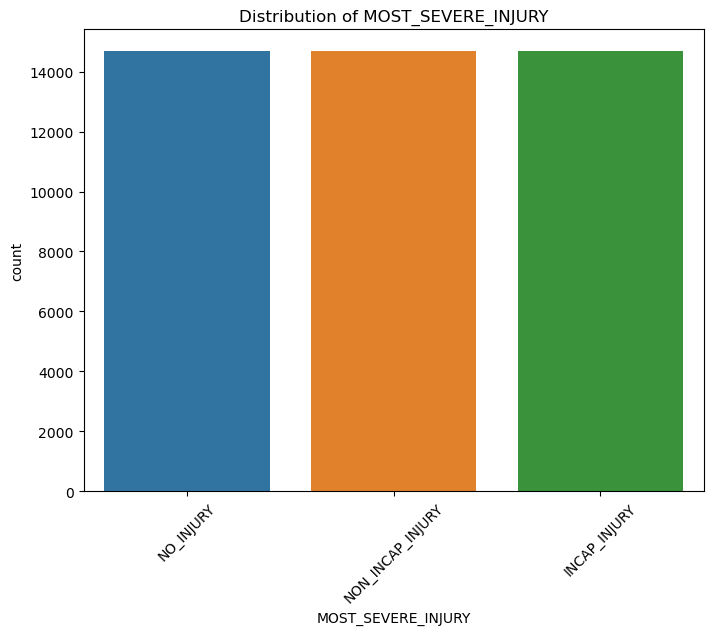

In [92]:
# Target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='MOST_SEVERE_INJURY', data=bal_crash_df)
plt.title('Distribution of MOST_SEVERE_INJURY')
plt.xticks(rotation=45)
plt.show()

In [93]:
# Filtered the data for outliers or incorrect values to match the Chicago area
chicago_df = bal_crash_df[(bal_crash_df['LATITUDE'].between(41.6, 42.0)) &
                          (bal_crash_df['LONGITUDE'].between(-87.9, -87.5))]

# Transformed chicago_df into a Geographic DataFrame
gdf = gpd.GeoDataFrame(chicago_df, geometry=gpd.points_from_xy(chicago_df.LONGITUDE, chicago_df.LATITUDE))

gdf.crs = "EPSG:4326"
gdf = gdf.to_crs(epsg=3857)


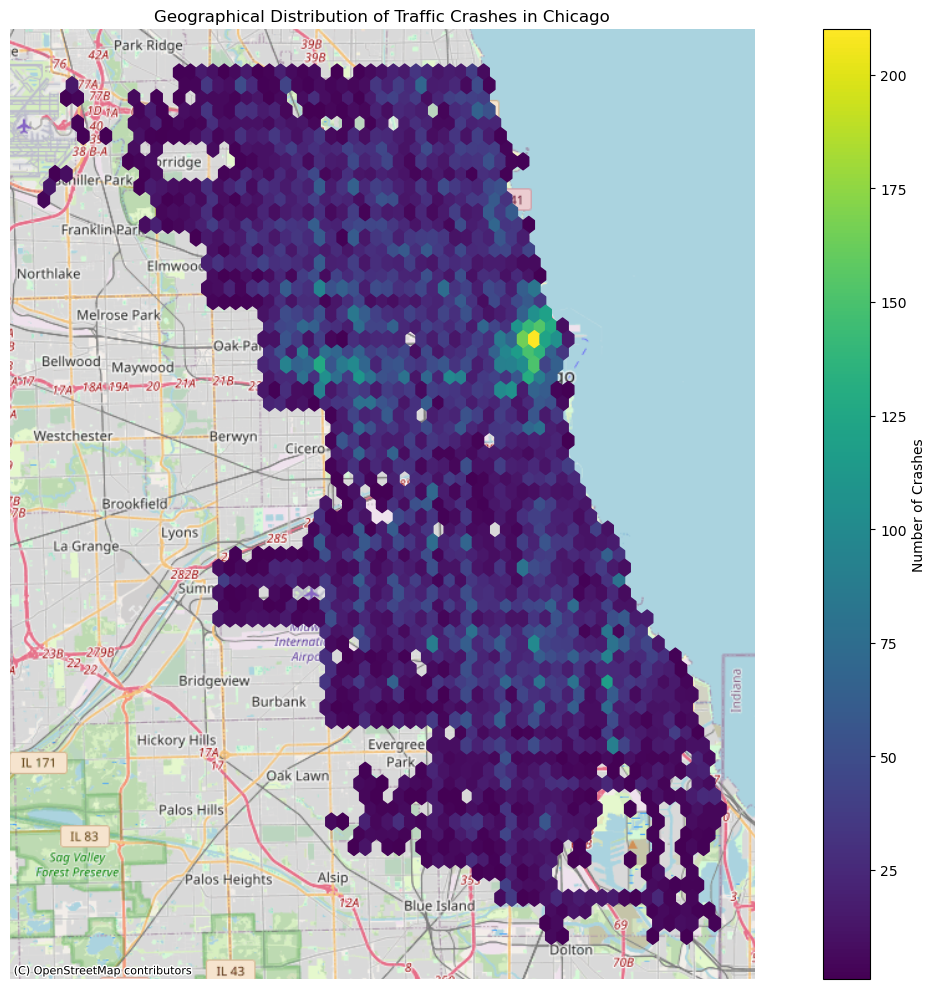

In [94]:
# Created a hexbin plot with the correct filters applied

# Hexbin plot
fig, ax = plt.subplots(figsize=(14, 10))

hb = ax.hexbin(gdf.geometry.x, gdf.geometry.y,
               gridsize=60,
               cmap='viridis',
               mincnt=1)

# Added a basemap with OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Added color bar
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Number of Crashes')

# Set labels and title
ax.set_title('Geographical Distribution of Traffic Crashes in Chicago')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_axis_off()  # Turned off the axis for a cleaner look

# Saved the figure
fig.savefig('Map_Crash_Locations.png', dpi=600)


plt.tight_layout()
plt.show()

In [95]:
# choosing numerical columns for Train Test Split
bal_crash_df = bal_crash_df.drop(columns = ['LATITUDE', 'LONGITUDE'], axis=1)
bal_crash_df.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'],
      dtype='object')

Above Graph shows more incidents happened in the location (Latiude: 41.85 and 41.90) between Longitude: -87.65 and -87.60.

## 4. Train Test Split & Pipeline:


In [96]:
# Select numerical and categorical columns
numerical_features = bal_crash_df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = bal_crash_df.select_dtypes(include=['object']).columns.drop('MOST_SEVERE_INJURY')  # Exclude target

# Define preprocessing for numerical columns (scale them)
numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

# Define preprocessing for categorical columns (encode them)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [97]:
# Split the data into training and testing sets
X = bal_crash_df.drop('MOST_SEVERE_INJURY', axis=1)
y = bal_crash_df['MOST_SEVERE_INJURY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
28744,35,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,2,LATE_NIGHT,1,9
32422,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR_END,NOT DIVIDED,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,2,MORNING_PEAK,3,9
8600,35,TRAFFIC SIGNAL,RAIN,DUSK,REAR_END,DIVIDED - W/MEDIAN BARRIER,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2,EVENING_PEAK,7,7
10016,35,TRAFFIC SIGNAL,RAIN,DAYLIGHT,REAR_END,DIVIDED - W/MEDIAN BARRIER,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",FOLLOWING TOO CLOSELY,NOT APPLICABLE,2,MID_DAY,3,11
35180,30,UNKNOWN,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,2,MID_DAY,5,11


In [98]:
X_train.shape, X_test.shape

((35222, 14), (8806, 14))

In [99]:
X_train.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'NUM_UNITS', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'],
      dtype='object')

In [100]:
y_train.value_counts(), y_test.value_counts()

(MOST_SEVERE_INJURY
 NON_INCAP_INJURY    11762
 INCAP_INJURY        11753
 NO_INJURY           11707
 Name: count, dtype: int64,
 MOST_SEVERE_INJURY
 NO_INJURY           2969
 INCAP_INJURY        2923
 NON_INCAP_INJURY    2914
 Name: count, dtype: int64)

## 5. Model 1(Baseline Model): Logistic Regression

In [101]:
# Pipeline with model
pipeline = Pipeline([
    ('preprocessor', ct),  # ColumnTransformer
    ('model', LogisticRegression(max_iter=1000, random_state=42))  # Added a classifier to the pipeline
])


In [104]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

                  precision    recall  f1-score   support

    INCAP_INJURY       0.57      0.56      0.57      2923
NON_INCAP_INJURY       0.55      0.63      0.58      2914
       NO_INJURY       0.99      0.86      0.92      2969

        accuracy                           0.69      8806
       macro avg       0.70      0.68      0.69      8806
    weighted avg       0.71      0.69      0.69      8806

0.685214626391097


Baseline Model Logistic Regression scored accuracy of 68.5.

## 6. Model 2: Random Forest Classifier

Running Random Forest Classifier with Target as multivariable classfication, choosing parameters n_estimators = 50. 

In [105]:
# Create a preprocessing and modeling pipeline with Random Forest
pipeline_rf = Pipeline(steps=[('preprocessor', ct),
                              ('model', RandomForestClassifier(n_estimators=50, max_depth = 3, max_features = 'sqrt', random_state=42))])
pipeline_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['POSTED_SPEED_LIMIT', 'NUM_UNITS', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=3, n_estimators=50,
                                        random_state=42))])

In [108]:
# Fit the pipeline to the training data
pipeline_rf.fit(X_train, y_train)

# Predict on the test set
y_pred2 = pipeline_rf.predict(X_test)

print(classification_report(y_test, y_pred2))

                  precision    recall  f1-score   support

    INCAP_INJURY       0.56      0.58      0.57      2923
NON_INCAP_INJURY       0.55      0.58      0.56      2914
       NO_INJURY       0.95      0.87      0.91      2969

        accuracy                           0.68      8806
       macro avg       0.69      0.68      0.68      8806
    weighted avg       0.69      0.68      0.68      8806



In [110]:
accuracy_score(y_test, y_pred2)

0.6770383829207358

## Model 3: XGBoost

In [111]:
# Create a preprocessing and modeling pipeline with Random Forest
pipeline_xg = Pipeline(steps=[('preprocessor', ct),
                              ('model', XGBClassifier(n_estimators=50, max_depth = 3, objective = 'binary:logistic', random_state=42))])
pipeline_xg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['POSTED_SPEED_LIMIT', 'NUM_UNITS', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['TRAFFI...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [112]:
# Initialized the LabelEncoder
le = LabelEncoder()

# Fitted and transformed the training labels to encode
y_train_encoded = le.fit_transform(y_train)

# Transformed the test labels to encode
y_test_encoded = le.transform(y_test)


In [114]:
# Fit the pipeline to the training data
pipeline_xg.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred3 = pipeline_xg.predict(X_test)

print(classification_report(y_test_encoded, y_pred3))
print(accuracy_score(y_test_encoded, y_pred3))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57      2923
           1       0.55      0.65      0.60      2914
           2       1.00      0.86      0.93      2969

    accuracy                           0.69      8806
   macro avg       0.71      0.69      0.70      8806
weighted avg       0.71      0.69      0.70      8806

0.6903247785600727


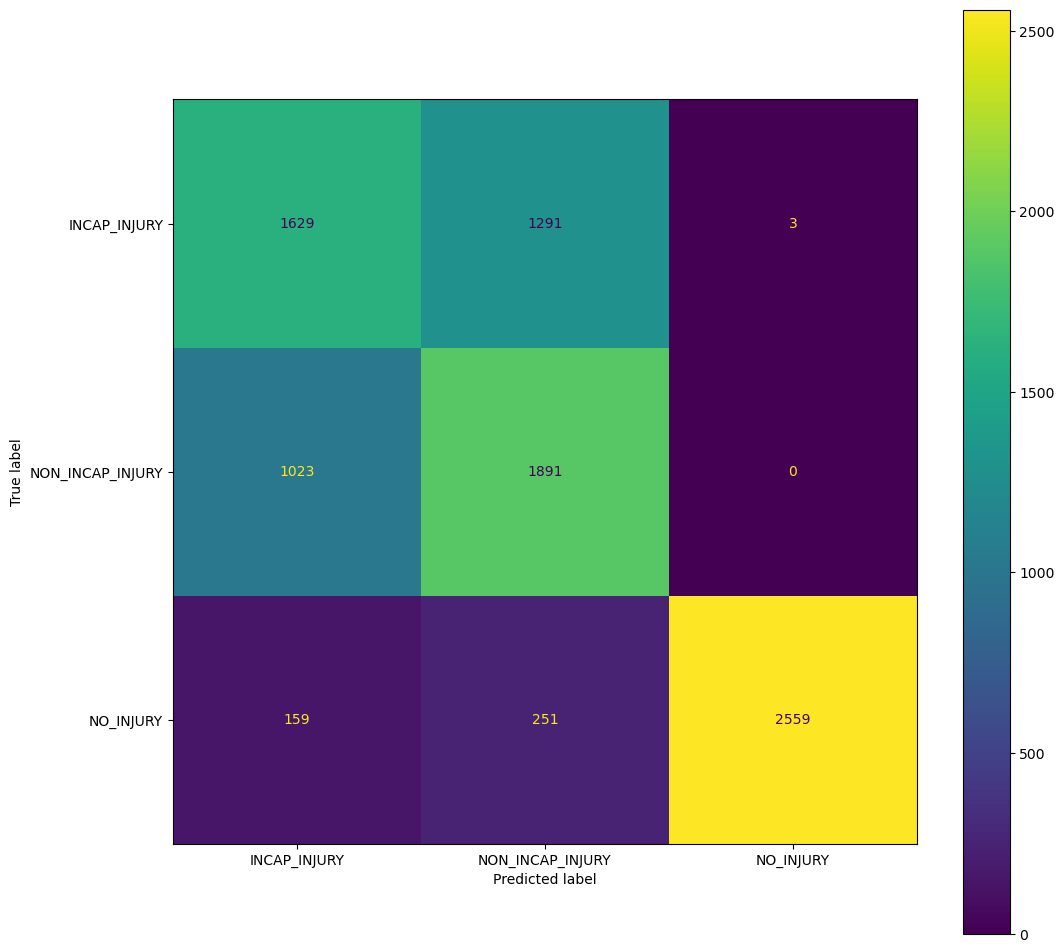

In [47]:
disp = ConfusionMatrixDisplay.from_estimator(
    pipeline_xg, 
    X_test, 
    y_test_encoded, 
    display_labels=le.classes_  # This should be the original class names
)

disp.figure_.set_size_inches(12, 12)

# Saved the figure
disp.figure_.savefig('confusion_matrix.png', dpi=300)


plt.show()

In [71]:
column_transformer = pipeline_xg.named_steps['preprocessor']
transformed_column_names = column_transformer.get_feature_names_out()

number_of_columns = len(transformed_column_names)
print(f"The total number of columns is: {number_of_columns}")

The total number of columns is: 145


In [49]:
# finding feature importance and plotting for results
xg_estimator = pipeline_xg.named_steps['model']
feat_imp = xg_estimator.feature_importances_


feat_imp_series = pd.Series(feat_imp, index = transformed_column_names).sort_values(ascending = False)
top20_xg_model = feat_imp_series.head(20)

top20_xg_model

cat__CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH             0.600046
cat__FIRST_CRASH_TYPE_REAR_END                               0.042791
cat__FIRST_CRASH_TYPE_PED/BICYCLIST                          0.029816
cat__FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE                   0.020507
cat__DAMAGE_OVER $1,500                                      0.019291
cat__PRIM_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER    0.013785
num__NUM_UNITS                                               0.010820
cat__WEATHER_CONDITION_UNKNOWN                               0.009230
cat__FIRST_CRASH_TYPE_ANGLE                                  0.008832
cat__FIRST_CRASH_TYPE_HEAD ON                                0.008349
cat__FIRST_CRASH_TYPE_FIXED OBJECT                           0.007698
cat__CRASH_HOUR_EVENING_PEAK                                 0.007231
cat__CRASH_HOUR_LATE_NIGHT                                   0.006708
cat__DAMAGE_$500 OR LESS                                     0.005837
cat__WEATHER_CONDITI

In [50]:
feature_names_to_simplify = {
    "cat__CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH": "INJURY TOW CRASH",
    "cat__FIRST_CRASH_TYPE_REAR_END": "REAR END",
    "cat__FIRST_CRASH_TYPE_PED/BICYCLIST": "PED BICYCLIST",
    "cat__FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE": "PARKED MOTOR VEHICLE",
    "cat__DAMAGE_OVER $1,500": "DAMAGE OVER $1500",
    "cat__PRIM_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER": "PHYSICAL CONDITION OF DRIVER",
    "cat__CRASH_HOUR_LATE_NIGHT": "LATE NIGHT",
    "cat__FIRST_CRASH_TYPE_FIXED OBJECT": "FIXED OBJECT",
    "cat__FIRST_CRASH_TYPE_HEAD ON": "HEAD ON",
    "num__NUM_UNITS": "NUM UNITS",
    "cat__CRASH_HOUR_AFTERNOON": "AFTERNOON",
    "cat__DAMAGE_$500 OR LESS": "DAMAGE $500 OR LESS",
    "cat__PRIM_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED TO AVOID CRASH": "FAILING TO REDUCE SPEED",
    "cat__FIRST_CRASH_TYPE_SIDESWIPE": "SIDESWIPE",
    "cat__LIGHTING_CONDITION_UNKNOWN": "UNKNOWN LIGHTING CONDITION",
    "cat__PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY": "FOLLOWING TOO CLOSELY",
    "cat__PRIM_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS": "DISREGARDING TRAFFIC SIGNALS",
    "cat__PRIM_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)": "UNDER THE INFLUENCE",
    "cat__SEC_CONTRIBUTORY_CAUSE_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER": "ERRATIC DRIVING",
    "cat__FIRST_CRASH_TYPE_OTHER": "OTHER CRASH TYPE",
    "cat__WEATHER_CONDITION_UNKNOWN":"WEATHER UNKOWN",
    "cat__FIRST_CRASH_TYPE_ANGLE":"ANGLE COLLISION",
    "cat__LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD": "DARKNESS WITH LIGHTED RD",
    "cat__TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL":"TRAFFIC SIGNAL",
    "cat__LIGHTING_CONDITION_DAYLIGHT":"DAYLIGHT",
    "cat__CRASH_HOUR_EVENING_PEAK":"EVENING PEAK",
    "cat__WEATHER_CONDITION_CLEAR ":"WEATHER CLEAR"
    
}

top20_xg_model_renamed = top20_xg_model.rename(index=feature_names_to_simplify)

top20_xg_model_renamed

INJURY TOW CRASH                                   0.600046
REAR END                                           0.042791
PED BICYCLIST                                      0.029816
PARKED MOTOR VEHICLE                               0.020507
DAMAGE OVER $1500                                  0.019291
PHYSICAL CONDITION OF DRIVER                       0.013785
NUM UNITS                                          0.010820
WEATHER UNKOWN                                     0.009230
ANGLE COLLISION                                    0.008832
HEAD ON                                            0.008349
FIXED OBJECT                                       0.007698
EVENING PEAK                                       0.007231
LATE NIGHT                                         0.006708
DAMAGE $500 OR LESS                                0.005837
cat__WEATHER_CONDITION_CLEAR                       0.005468
TRAFFIC SIGNAL                                     0.005439
UNKNOWN LIGHTING CONDITION              

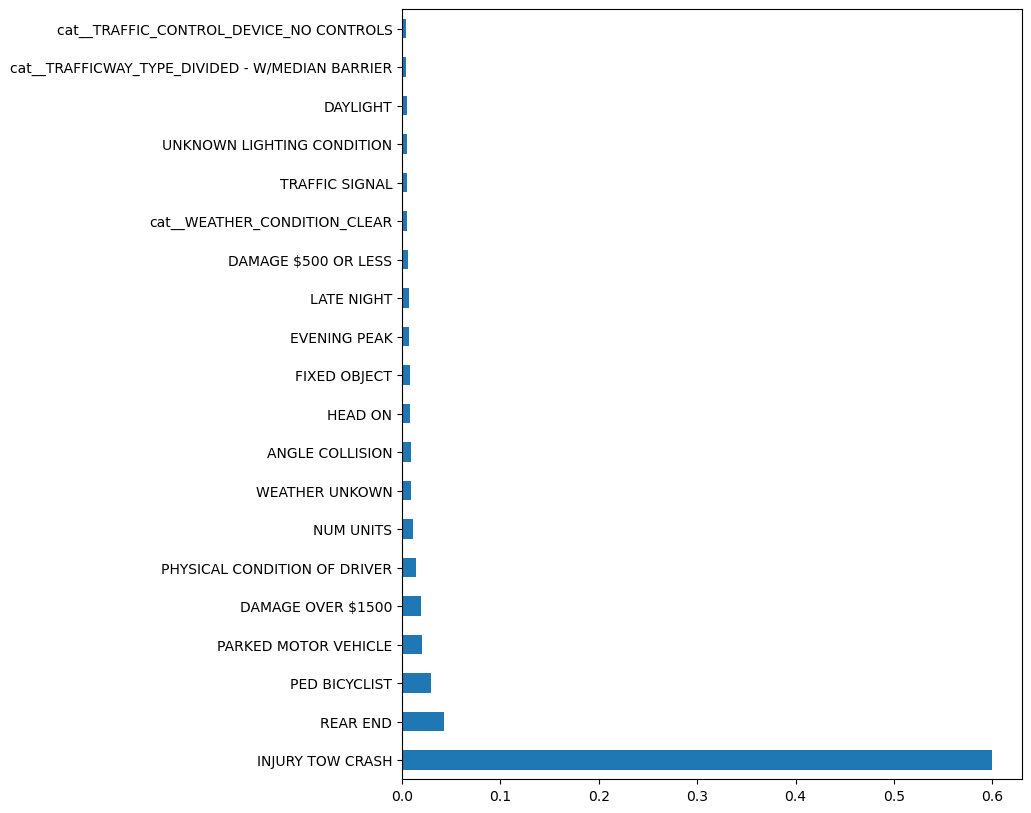

In [51]:
top20_xg_model_renamed.plot(kind = 'barh')

# Saved the figure
plt.savefig('top20_feature_importances.png', dpi=600)

plt.show()

XGBoost scored accuracy 69 better than our base model. Above graph shows major causes of incidents are RearEnd, Pedestrian/bicyclist, Hitting 
parked vehicle, Headon, Angle collision & hitting fixed object. Incidents caused by driver's negligence & their physical condition. Regarding 
lighting factor, most of the incidents happened in Darkness but there was street lighting, this may be due to less Visibility in nights. Vehicle damages results in more than $1500. Next, we are trying our gridsearch option to find best model with hyperparameter tuning.

## 8. GridSearch & Hyperparameter Tuning:

**GridSearch with Logistic Regression Model**

In [36]:
# Define the parameter grid
param_grid = {
    'model__C': [0.1, 1, 10, 100],
    'model__penalty': ['l2', 'l1'],
    'model__solver': ['liblinear'] 
}
pipeline = Pipeline([
    ('preprocessor', ct),  # ColumnTransformer
    ('model', LogisticRegression(max_iter=1000, random_state=42))  # Added a classifier to the pipeline
])

In [37]:
# create gridsearch object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring = 'accuracy')

#Fit gridsearch to data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['POSTED_SPEED_LIMIT', 'NUM_UNITS', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown...
                                                                         Index(['TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR'],
      dtype='object'))])),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__penalty': ['l2', 'l1'],
                         'model__solver': ['liblinear']},
             scoring='accuracy')

In [39]:
# Finding Best parameters as per gridsearch

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
best_model = grid_search.best_estimator_
best_model

Best parameters: {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best score: 0.6903355850218983


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['POSTED_SPEED_LIMIT', 'NUM_UNITS', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['TRAFFIC_CONTROL_DEVICE', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(C=1, max_iter=1000, random_state=42,
                                    solver='liblinear'))])

Gridsearch with Logistic Regression model scored accuracy 69.03 similar to XGBoost. Solvers liblinear, saga was not working, and gave error
message that model failed to converge with max iter 1000 and dataset is large. 

**GridSearch with Random Forest Classifier**

In [42]:
# Define the parameter grid
param_grid1 = {
    'model__n_estimators': [10, 50, 100],  # Values to try for n_estimators in RandomForestClassifier
    'model__max_depth': [3, 5, None],  # Values to try for max_depth in RandomForestClassifier
    'model__min_samples_split': [2,3,5] # Values to try for min_samples_split in RandomForestClassifier
}
pipeline_rf = Pipeline(steps=[('preprocessor', ct),
                              ('model', RandomForestClassifier(n_estimators=50, max_depth = 3, max_features = 'sqrt', random_state=42))])

In [43]:
# create gridsearch object for rf
grid_search1 = GridSearchCV(pipeline_rf, param_grid1, cv=5, scoring = 'accuracy')

#Fit gridsearch to data
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['POSTED_SPEED_LIMIT', 'NUM_UNITS', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown...
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestClassifier(max_depth=3,
                                                               n_estimators=50,
                                                               random_state=42))]),
             param_grid={'model__max_depth': [3, 5, None],
                         'model__min_samples_split': [2, 3, 5],
                         'model__n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [51]:
# Finding Best parameters as per gridsearch

print("Best parameters:", grid_search1.best_params_)
print("Best score:", grid_search1.best_score_)
best_model = grid_search1.best_estimator_


Best parameters: {'model__max_depth': 5, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best score: 0.6846572310961132


Gridsearch with Random Forest scored Accuracy 68.46, XGBoost and gridsearch with logistic performing better comparatively.

**GridSearch with XGBoost**

In [46]:
# Define the parameter grid
param_grid2 = {
    'model__n_estimators': [10, 50, 100],  # Values to try for n_estimators in XGB
    'model__max_depth': [3, 5, None],  # Values to try for max_depth in XGB
    'model__min_child_weight': [2,3,5], # Values to try for min_samples_split in XGB
    'model__learning_rate': [0.1, 0.2, 0.3] # Values to try for learning_rate in XGBoost
}
pipeline_xg = Pipeline(steps=[('preprocessor', ct),
                              ('model', XGBClassifier(n_estimators=50, max_depth = 3, objective = 'binary:logistic', random_state=42))])

In [50]:
# create gridsearch object for xgb
grid_search2 = GridSearchCV(pipeline_xg, param_grid2, cv=5, scoring = 'accuracy')

#Fit gridsearch to data
grid_search2.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['POSTED_SPEED_LIMIT', 'NUM_UNITS', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown...
                                                      max_depth=3,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=50,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid={'model__learning_rate': [0.1, 0.2, 0.3],
                         'model__max_depth': [3, 5, None],
                         'model__min_child_weight': [2, 3, 5],
                         'model__n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [69]:
# Finding Best parameters as per gridsearch

print("Best parameters:", grid_search2.best_params_)
print("Best score:", grid_search2.best_score_)
best_model_xg = grid_search2.best_estimator_

Best parameters: {'model__learning_rate': 0.3, 'model__max_depth': 3, 'model__min_child_weight': 5, 'model__n_estimators': 100}
Best score: 0.6914144529630037


In [79]:
# finding feature importance and plotting for results
xg_estimator_grid = best_model_xg.named_steps['model']
feat_imp = xg_estimator_grid.feature_importances_


feat_imp_series = pd.Series(feat_imp, index = transformed_column_names).sort_values(ascending = False)
top20_xggrid_model = feat_imp_series.head(20)

top20_xggrid_model

cat__CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH                                                   0.674207
cat__FIRST_CRASH_TYPE_REAR_END                                                                     0.034723
cat__FIRST_CRASH_TYPE_PED/BICYCLIST                                                                0.025678
cat__FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE                                                         0.016375
cat__PRIM_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER                                          0.012444
cat__DAMAGE_OVER $1,500                                                                            0.011976
num__NUM_UNITS                                                                                     0.007856
cat__FIRST_CRASH_TYPE_HEAD ON                                                                      0.006279
cat__WEATHER_CONDITION_UNKNOWN                                                                     0.005332
cat__CRASH_HOUR_LATE_NIGHT  

In [82]:
feature_names_to_simplify = {
    "cat__CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH": "INJURY TOW CRASH",
    "cat__FIRST_CRASH_TYPE_REAR_END": "REAR END",
    "cat__PRIM_CONTRIBUTORY_CAUSE_EXCEEDING AUTHORIZED SPEED LIMIT":"SPEEDING",
    "cat__FIRST_CRASH_TYPE_PED/BICYCLIST": "PED BICYCLIST",
    "cat__FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE": "PARKED MOTOR VEHICLE",
    "cat__DAMAGE_OVER $1,500": "DAMAGE OVER $1500",
    "cat__PRIM_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER": "PHYSICAL CONDITION OF DRIVER",
    "cat__CRASH_HOUR_LATE_NIGHT": "LATE NIGHT",
    "cat__FIRST_CRASH_TYPE_FIXED OBJECT": "FIXED OBJECT",
    "cat__FIRST_CRASH_TYPE_HEAD ON": "HEAD ON",
    "num__NUM_UNITS": "NUM UNITS",
    "cat__CRASH_HOUR_AFTERNOON": "AFTERNOON",
    "cat__DAMAGE_$500 OR LESS": "DAMAGE $500 OR LESS",
    "cat__PRIM_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED TO AVOID CRASH": "FAILING TO REDUCE SPEED",
    "cat__FIRST_CRASH_TYPE_SIDESWIPE": "SIDESWIPE",
    "cat__LIGHTING_CONDITION_UNKNOWN": "UNKNOWN LIGHTING CONDITION",
    "cat__PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY": "FOLLOWING TOO CLOSELY",
    "cat__PRIM_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS": "DISREGARDING TRAFFIC SIGNALS",
    "cat__PRIM_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)": "UNDER THE INFLUENCE",
    "cat__SEC_CONTRIBUTORY_CAUSE_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER": "ERRATIC DRIVING",
    "cat__FIRST_CRASH_TYPE_OTHER": "OTHER CRASH TYPE",
    "cat__WEATHER_CONDITION_UNKNOWN":"WEATHER UNKOWN",
    "cat__WEATHER_CONDITION_CLEAR":"WEATHER CLEAR",
    "cat__FIRST_CRASH_TYPE_ANGLE":"ANGLE COLLISION",
    "cat__LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD": "DARKNESS WITH LIGHTED RD",
    "cat__TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL":"TRAFFIC SIGNAL",
    "cat__LIGHTING_CONDITION_DAYLIGHT":"DAYLIGHT",
    "cat__CRASH_HOUR_EVENING_PEAK":"EVENING PEAK",
    "cat__WEATHER_CONDITION_CLEAR ":"WEATHER CLEAR",
    "cat__TRAFFICWAY_TYPE_TRAFFIC ROUTE":"TRAFFIC ROUTE"
    
}

top20_xggrid_model_renamed = top20_xggrid_model.rename(index=feature_names_to_simplify)

top20_xggrid_model_renamed

INJURY TOW CRASH                0.674207
REAR END                        0.034723
PED BICYCLIST                   0.025678
PARKED MOTOR VEHICLE            0.016375
PHYSICAL CONDITION OF DRIVER    0.012444
DAMAGE OVER $1500               0.011976
NUM UNITS                       0.007856
HEAD ON                         0.006279
WEATHER UNKOWN                  0.005332
LATE NIGHT                      0.005144
DAMAGE $500 OR LESS             0.004924
ANGLE COLLISION                 0.004069
DISREGARDING TRAFFIC SIGNALS    0.004004
FOLLOWING TOO CLOSELY           0.003943
SPEEDING                        0.003942
UNDER THE INFLUENCE             0.003850
FIXED OBJECT                    0.003736
TRAFFIC SIGNAL                  0.003680
WEATHER CLEAR                   0.003661
TRAFFIC ROUTE                   0.003549
dtype: float32

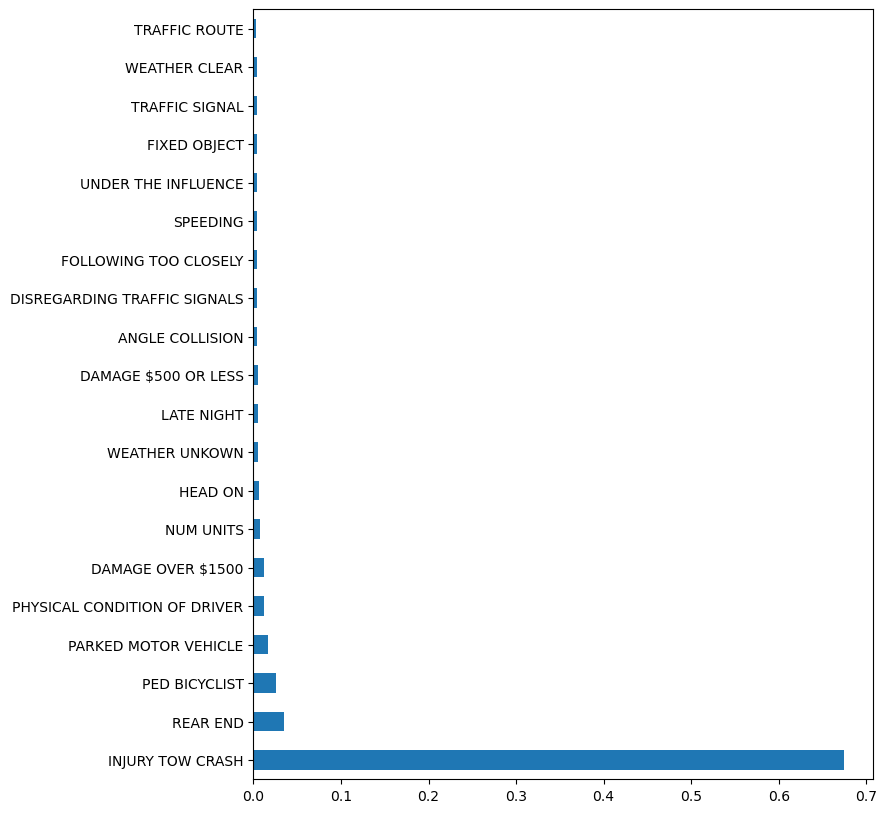

In [83]:
top20_xggrid_model_renamed.plot(kind = 'barh')

# Saved the figure
plt.savefig('top20_feature2_importances.png', dpi=600)

plt.show()

Gridsearch with XGBoost scored better accuracy score 69.14 compared to other models, and visualizing feature importance for this model. Above graph shows major causes of incidents are RearEnd, Pedestrian/bicyclist, Hitting parked vehicle, Headon, Angle collision & hitting fixed object. Incidents caused by driver's negligence, physical condition, tailgating, reckless driving, drunken driving & speeding. Regarding lighting factor, most of the incidents happened in Darkness but there was street lighting, this may be due to less Visibility in nights. Vehicle damages results in more than $1500
and some scenarios less than $500 damages.


## 8. Final Model using TensorFlow & Keras:

Running Tensorflow model with dataset.


In [53]:
X = bal_crash_df.drop('MOST_SEVERE_INJURY', axis=1)
y = bal_crash_df['MOST_SEVERE_INJURY']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=42)

In [54]:
X_train2_proc = ct.fit_transform(X_train2)
X_test2_proc = ct.transform(X_test2)

X_train2_proc.shape, X_test2_proc.shape

((33021, 145), (11007, 145))

In [56]:
X_train2_dense = X_train2_proc.toarray()
X_train2_dense

array([[ 0.14412268, -0.15878134, -0.5470825 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14412268, -0.15878134,  1.4499561 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14412268, -0.15878134, -1.04634215, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.0668174 , -0.15878134, -0.04782285, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.14412268, -1.76218156, -0.5470825 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.77857205, -0.15878134, -0.5470825 , ...,  0.        ,
         1.        ,  0.        ]])

In [57]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the training set target variable
label_encoder.fit(y_train2)

# Transform the target variable of both training and testing sets
y_train2_proc = label_encoder.transform(y_train2)
y_test2_proc = label_encoder.transform(y_test2)
y_train2_proc.shape

(33021,)

In [58]:
reg = l2(3e-3) # 1e-5 to .1
# Number of features
n_features = (X_train2_proc.shape[1],)

tensor_crash_model = Sequential()
tensor_crash_model.add(Dense(32, activation='relu', kernel_regularizer = reg, input_shape = (n_features)))
tensor_crash_model.add(Dense(8, activation='relu', kernel_regularizer = reg))
tensor_crash_model.add(Dense(3, activation = 'softmax'))

In [59]:
tensor_crash_model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [60]:
trainCallback = EarlyStopping(monitor='loss', min_delta = 1e-6, patience = 5)

history_crash = tensor_crash_model.fit(X_train2_dense, y_train2_proc, epochs=30, batch_size= 32, validation_split = 0.2, callbacks=[trainCallback])

Epoch 1/30
826/826 [==============================] - 3s 2ms/step - loss: 0.7428 - accuracy: 0.6510 - val_loss: 0.6516 - val_accuracy: 0.6815
Epoch 2/30
826/826 [==============================] - 1s 2ms/step - loss: 0.6461 - accuracy: 0.6846 - val_loss: 0.6368 - val_accuracy: 0.6852
Epoch 3/30
826/826 [==============================] - 1s 2ms/step - loss: 0.6361 - accuracy: 0.6875 - val_loss: 0.6272 - val_accuracy: 0.6861
Epoch 4/30
826/826 [==============================] - 2s 2ms/step - loss: 0.6309 - accuracy: 0.6883 - val_loss: 0.6214 - val_accuracy: 0.6872
Epoch 5/30
826/826 [==============================] - 2s 2ms/step - loss: 0.6281 - accuracy: 0.6883 - val_loss: 0.6206 - val_accuracy: 0.6851
Epoch 6/30
826/826 [==============================] - 2s 2ms/step - loss: 0.6246 - accuracy: 0.6897 - val_loss: 0.6162 - val_accuracy: 0.6883
Epoch 7/30
826/826 [==============================] - 2s 2ms/step - loss: 0.6227 - accuracy: 0.6889 - val_loss: 0.6153 - val_accuracy: 0.6874
Epoch 

In [61]:
y_proba = tensor_crash_model.predict(X_test2_proc) 
y_proba[0:5]

344/344 [==============================] - 1s 1ms/step


array([[4.2158276e-01, 4.8261166e-01, 9.5805593e-02],
       [5.5177778e-01, 4.4275612e-01, 5.4660733e-03],
       [4.0604192e-04, 4.6399512e-04, 9.9912989e-01],
       [4.4141814e-01, 4.2885226e-01, 1.2972963e-01],
       [3.1844854e-01, 3.4594131e-01, 3.3560997e-01]], dtype=float32)

In [62]:
# returns loss + results of metrics used
tensor_crash_model.evaluate(X_test2_proc, y_test2_proc, verbose=0)

[0.6094357967376709, 0.6852003335952759]

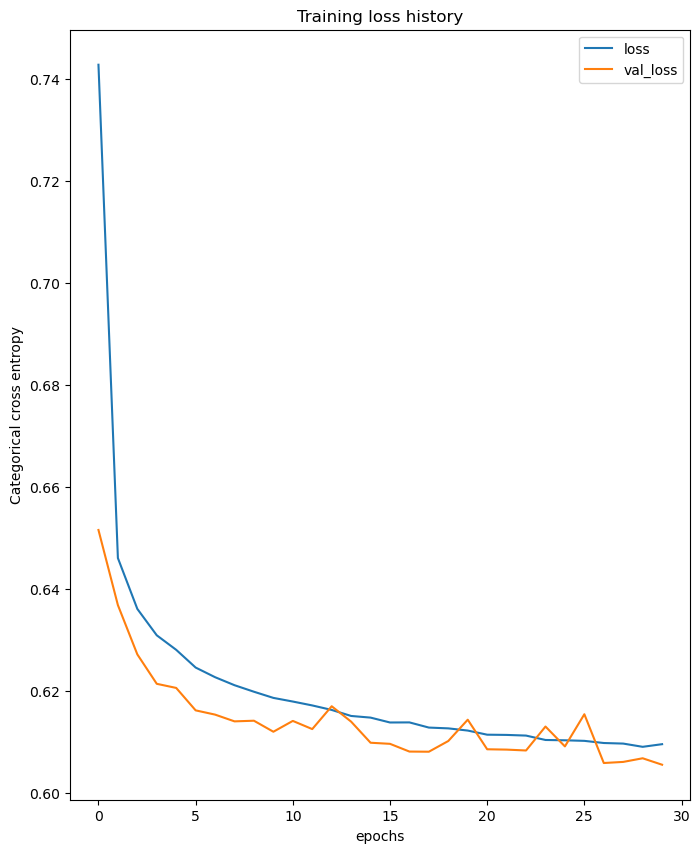

In [63]:
train_crash_history = pd.DataFrame(history_crash.history)
train_crash_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_crash_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')

plt.savefig('training_loss_history.png', dpi=300)


plt.show()

<Figure size 500x400 with 0 Axes>

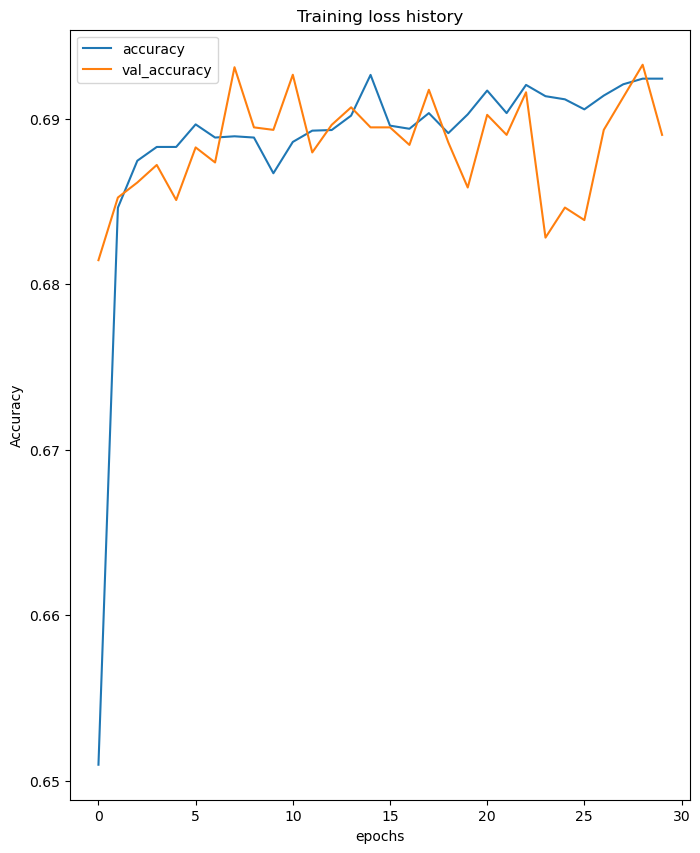

In [64]:
col_list = ['accuracy', 'val_accuracy']
plt.figure(figsize=(5,4))
train_crash_history[col_list].plot()

plt.ylabel('Accuracy')
plt.title('Training loss history')

plt.savefig('training_accuracy_history.png', dpi=300)

plt.show()

In [65]:
predicted = np.argmax(y_proba, axis=-1)
predicted

array([1, 0, 2, ..., 1, 1, 0], dtype=int64)

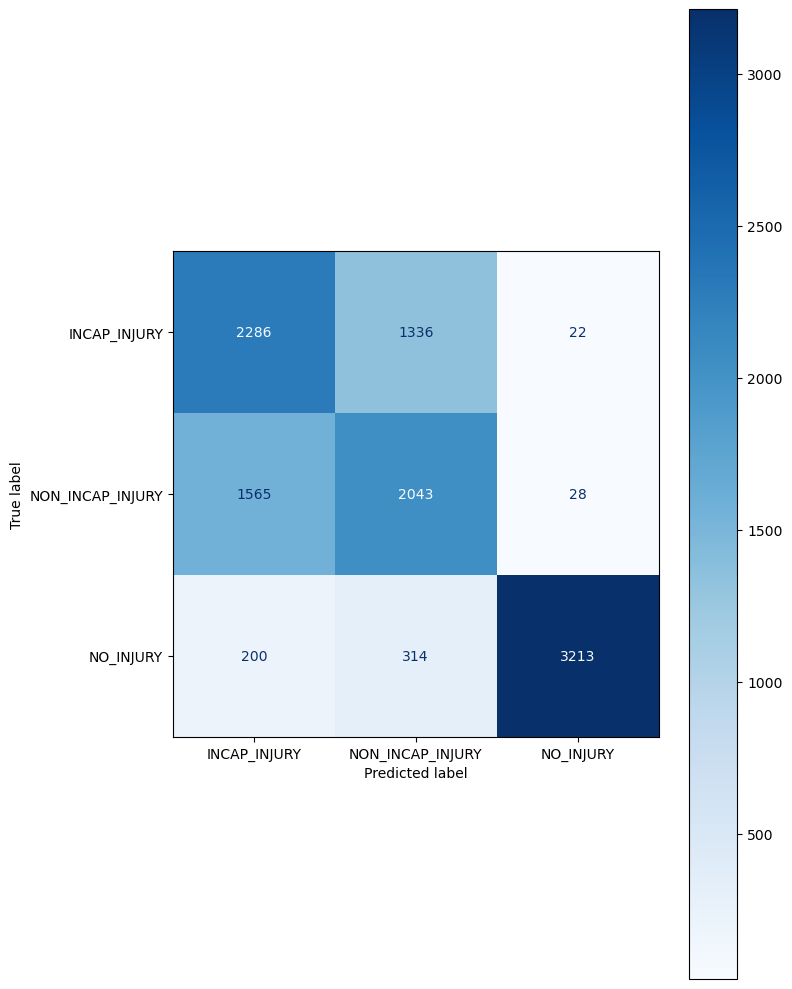

In [68]:
cm_digits = confusion_matrix(y_test2_proc, predicted)
disp2 = ConfusionMatrixDisplay(
    confusion_matrix=cm_digits,
    display_labels=le.classes_  
)

disp2.plot(cmap=plt.cm.Blues)
plt.tight_layout()
# Saved the figure
disp2.figure_.savefig('confusion_matrix_Tensor.png', dpi=300)

plt.show()

## Conclusion:

Our Target Class 'No_Injury', 'Non_Incap_Injury' and 'Incap_Injury' had class imbalance, we went for Downsampling option, and focussed on Metric "ACCURACY". Downsampled the dataset to have balanced target class for 'No_Injury', 'Non_Incap_Injury' and 'Incap_Injury'. We ran Baseline model with Logistic Regression and got accuracy score of 69. Second model with Random Forest Classifier with tuned hyper parameters resulted in lower accuracy score 68. Third model XGBoost and 
scored accuracy of 69.

We also tried our Gridsearch with hypertuned parameters and used same models(Logistic Regression, Random Forest & XGBoost). Gridsearch with XGBoost scored better accuracy score 69.14 compared to other models, and visualizing feature importance for this model. Above graph shows major causes of incidents are RearEnd, Pedestrian/bicyclist, Hitting parked vehicle, Headon, Angle collision & hitting fixed object. Incidents caused by driver's negligence, physical condition, tailgating, reckless driving, drunken driving & speeding. Regarding lighting factor, most of the incidents happened in Darkness but there was street lighting, this may be due to less Visibility in nights. Vehicle damages results in more than $1500
and some scenarios less than $500 damages.

We also checked Tensorflow model to find if we can get better results by choosing 2 Hidden layers, activation function as softmax for multi classification target, optimizer Adam, loss as sparse_categorical_crossentropy, metrics accuracy, epochs 30, added regularization and validation 
size 0.2, we came up with better accuracy score 68, validation accuracy was better than training accuracy score.

   MODEL                             Accuracy Score on Test

1. Logistic Regression               0.685214626391097                            
2. Random Forest                     0.6770383829207358
3. XGBoost                           0.6903247785600727
4. Gridsearch with Logistic          0.6903355850218983
5. Gridsearch with RandomForest      0.6846572310961132
6. Gridsearch with XGBoost           0.6914144529630037
7. TensorFlow                        0.6852003335952759

We conclude Gridsearch with XGBoost {'model__learning_rate': 0.3, 'model__max_depth': 3, 'model__min_child_weight': 5, 'model__n_estimators': 100}
considered as our best model to find the major causes of car crash. 
